In [12]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import datetime
import plotly
from plotly import graph_objs as go

In [4]:
djia_constituents = pd.read_csv(r"C:\Users\malani\Documents\Mean-Reversion-Algorithm-Trading-Bot\Stocks in the Dow Jones Industrial Average.csv")
djia_constituents = djia_constituents.drop(25)
djia_constituents.tail()

,Symbol,Description,Category2,GICS Sector,Market cap,Market Cap Weight,Index Weight,Dividend yield,Country,Action
24,KO,Coca-Cola,Common stocks,Consumer Staples,"$262,541,200,257",2.60%,1.19%,2.84%,USA,Analyze
26,CSCO,Cisco Systems Inc,Common stocks,Information Technology,"$191,431,049,741",1.90%,0.89%,3.21%,USA,Analyze
27,WBA,Walgreen Boots Alliance Inc,Common stocks,Consumer Staples,"$34,704,949,342",0.34%,0.75%,4.69%,USA,Analyze
28,VZ,Verizon Communications Inc,Common stocks,Communication Services,"$160,265,033,778",1.59%,0.75%,6.60%,USA,Analyze
29,INTC,Intel Corporation Corp,Common stocks,Information Technology,"$123,356,030,000",1.22%,0.58%,4.80%,USA,Analyze


In [7]:
# sample = pd.DataFrame(columns=['Ticker', 'Prices'])
sample = {}

for i in range(len(djia_constituents)):
    ticker=yf.Ticker(djia_constituents.iat[i, 0])
    data = ticker.history(period='1846d')
    del data['Dividends']
    del data['Stock Splits']
    del data['Open']
    del data['High']
    del data['Low']
    del data['Volume']
    data["STD"] = data[["Close"]].rolling(20).std()
    data["MIDDLEBB"] = data[["Close"]].rolling(20).mean()
    data["UPPERBB"] = data["MIDDLEBB"] + 2 * data["STD"]
    data["LOWERBB"] = data["MIDDLEBB"] - 2 * data["STD"]
    data = data.tail(data.shape[0] -20)
    del data["STD"]

    # sample.insert(i, "Ticker", ticker)
    sample.update({djia_constituents.iat[i, 0] : data})

print(sample['AAPL'])

                                Close    MIDDLEBB     UPPERBB     LOWERBB
Date                                                                     
2015-08-21 00:00:00-04:00   24.102165   26.598167   28.475776   24.720558
2015-08-24 00:00:00-04:00   23.500525   26.380564   28.619949   24.141179
2015-08-25 00:00:00-04:00   23.641815   26.163106   28.581547   23.744665
2015-08-26 00:00:00-04:00   24.997791   26.017871   28.343593   23.692148
2015-08-27 00:00:00-04:00   25.733898   25.916474   28.094172   23.738775
...                               ...         ...         ...         ...
2022-11-14 00:00:00-05:00  148.279999  145.559690  156.658121  134.461259
2022-11-15 00:00:00-05:00  150.039993  145.886093  157.114169  134.658017
2022-11-16 00:00:00-05:00  148.789993  146.144505  157.391034  134.897977
2022-11-17 00:00:00-05:00  150.720001  146.522879  157.854445  135.191313
2022-11-18 00:00:00-05:00  151.289993  146.736073  158.266207  135.205940

[1826 rows x 4 columns]


<AxesSubplot:xlabel='Date'>

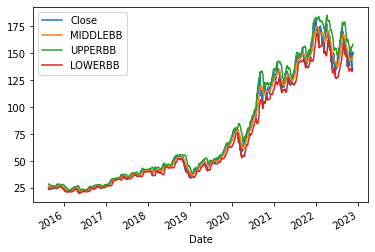

In [14]:
sample['AAPL'].plot()